#### Annotation Tool Script ####
* Annotation Script for Images Object Classification 

In [1]:
import numpy as np
import cv2
import glob

In [2]:
import tkinter as tk
import tkinter.simpledialog

In [19]:
import sys
sys.path.append('C:/Users/Mafeus/Desktop/Git_Repos/OpenCV')
import OpCV_Utils

In [15]:
data_folder_path = 'images_data/'
images = glob.glob(data_folder_path + '*.png')

In [16]:
main = tk.Tk()
main.withdraw()

bboxes = []

for i, img_path in enumerate(images):
    
    img_name = img_path.split('\\')[-1].split(',')[0]
    img = cv2.imread(img_path)
    img = cv2.resize(img, (360,300))
    
    roi = cv2.selectROI("Select Object", img)
    p_start = (roi[0], roi[1])
    p_end = (roi[0]+roi[2], roi[1]+roi[3])
    
    class_name = tkinter.simpledialog.askstring('Define Class', 'Define Class: ')
        
    bboxes.append([img_name, p_start, p_end, class_name])

cv2.destroyAllWindows()
print(bboxes[0])
print(bboxes[1])
print(bboxes[2])

['img1.png', (91, 13), (305, 236), 'crow']
['img2.png', (40, 9), (281, 258), 'crow']
['img3.png', (219, 13), (294, 128), 'crow']


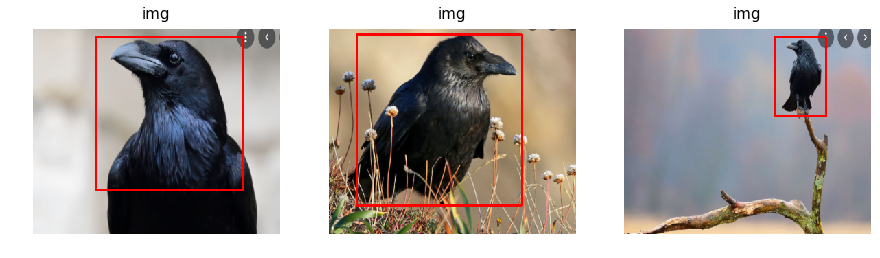

In [25]:
imgs = []

for i in range(3):
    image = cv2.imread(images[i])
    image = cv2.resize(image, (360,300))
    cv2.rectangle(image, bboxes[i][1], bboxes[i][2], (0,0,255), 2)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imgs.append(image)
    
OpCV_Utils.show_multiple_images_plt([imgs], [['img', 'img', 'img']], fig_size=(15,10))